In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Artist.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Artist.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Artist Jobs - Upwork(1).csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_3337/2021988743.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,Contractor_tier,Skill_one,Skill_two,skill_three,skill_four
0,MAYA randomisation script & positioning,We have a fully rigged model (head and body).W...,None,"3D Rendering', '3D Animation', 'Autodesk Maya'...","\n $2,000\n",Fixed-price,Expert,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logo needed for Startup,I'm looking for someone to design my startup's...,None,"Social Media Imagery', 'Minimal', 'Logo Design...",\n $40\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Voice over artist in Malay and Tamil,I am looking for Voice over artist in Malay an...,None,"Voice Acting', 'Voice-Over', 'Female', 'Voice ...",\n $5\n,Fixed-price,Entry level,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Looking For YouTube Voice Over Artist (5 Proje...,LONG-TERM position! Bonuses and raises will be...,None,"Casual Tone', 'Corporate Tone', 'Energetic Ton...",\n $12\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grooming artist required for 3d character real...,"Realistic fur is required,Reference uploaded I...",None,"3D Art', 'Fur', 'Blender', '3D Modeler', 'Char...",\n $300\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Shading Artist/Tech Artist,"Hi, I'm looking for a Shading Artist to recrea...",NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Shading-Artist-Tech...,Hourly,Expert,3D Texturing,Concept Artistry,Game Asset,Character Design
436,"Charakter Artist, Portrait Drawing, Digital Ar...",Hi. I'm looking for an artist who draws realis...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Charakter-Artist-Po...,Fixed-price,Expert,Digital Illustration,Individual Portrait,Realistic Portrait,Drawing
437,3D Artist / Unreal Artist,Hello !\n\nWe are currently looking for a 3D A...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Artist-Unreal-Artis...,Hourly,Intermediate,3D Modeling,3D Design,3D Animation,3D Printing
438,Corel Painter: Experienced fine artist Seeking...,Seeking a coach/teacher for digital painting a...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Corel-Painter-Exper...,Hourly,Intermediate,Academic Editing,Business Editing,Editor,Technical Editing


In [4]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

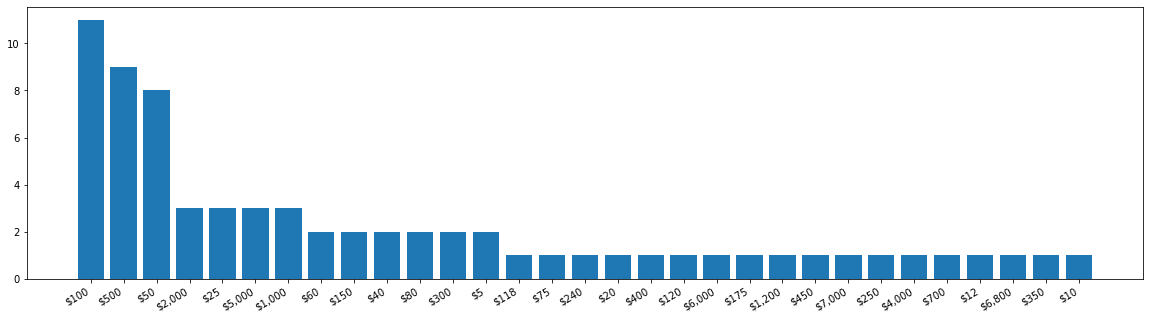

In [5]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.xticks(rotation=30, ha="right")
plt.show()



In [6]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [7]:
merge["CT"] = merge["CT"].str.strip()

In [8]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    217
Expert          151
Entry level      72
Name: CT, dtype: int64

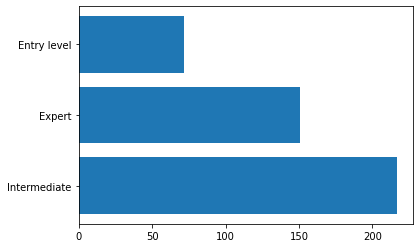

In [9]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [10]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [12]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [13]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [14]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

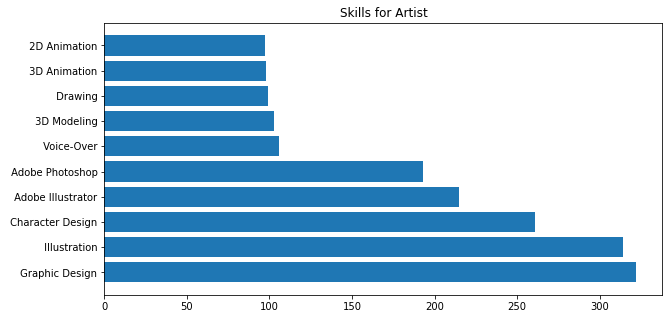

In [24]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.title("Skills for Artist")
plt.barh(count_skill.index,count_skill.values)
plt.show()

In [16]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

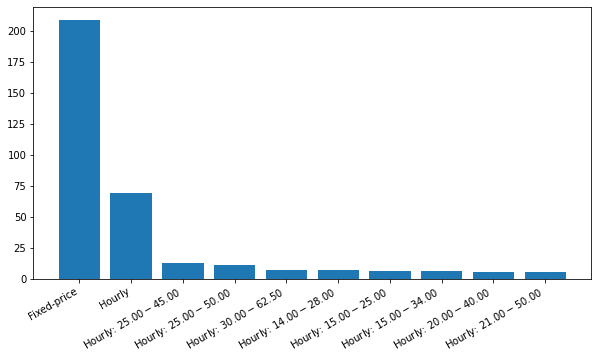

In [17]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


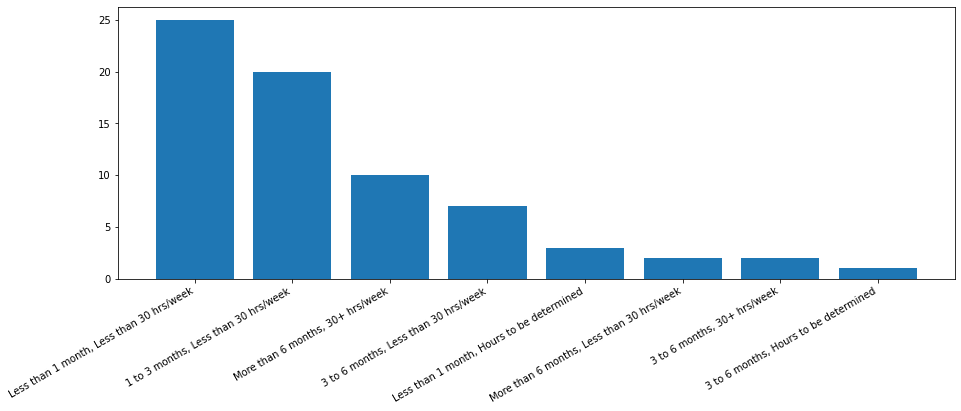

In [18]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

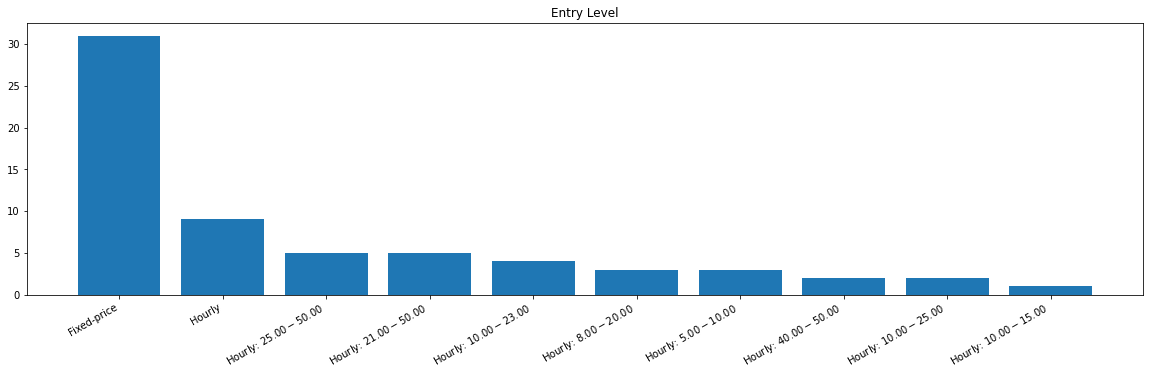

In [19]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


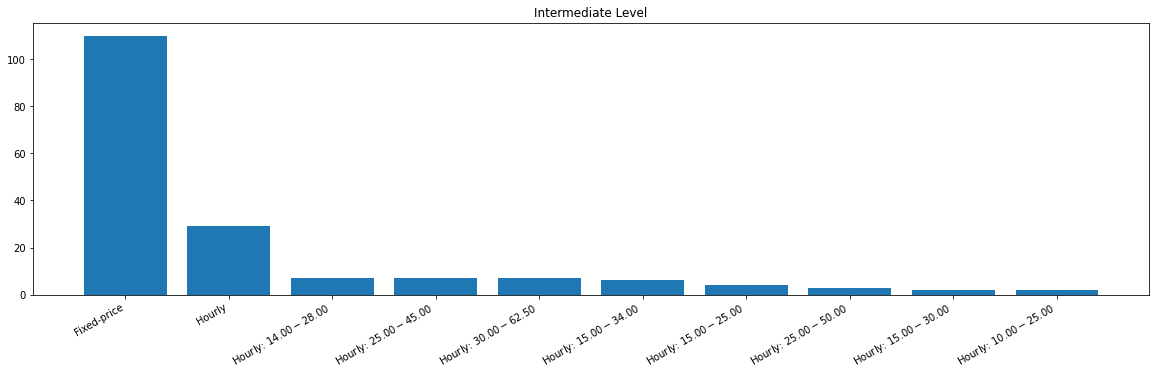

In [20]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

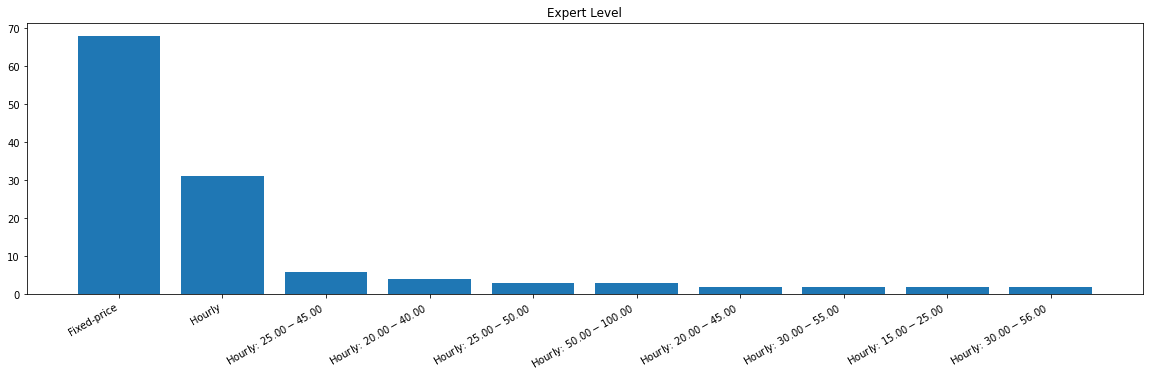

In [21]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

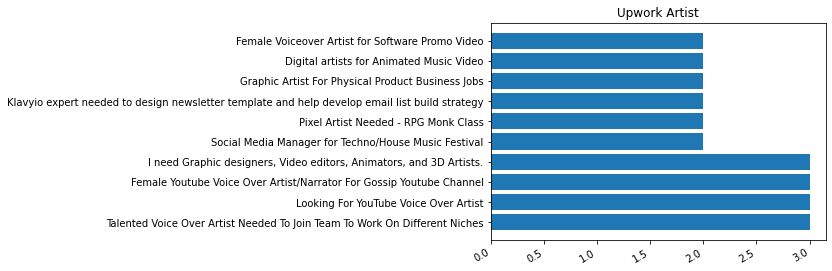

In [22]:
count_job_title = merge["Title"].value_counts()[0:10]
plt.barh(count_job_title.index, count_job_title.values)
plt.title("Upwork Artist")
plt.xticks(rotation="30",ha="right")
plt.show()